In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

# 음수지원
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

# 1. 2020년 교통사고와 음주운전 데이터 준비

In [5]:
data20 = pd.read_csv("data/주소포함_2020.csv", encoding = "cp949")
data20.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_9564\505891077.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data20 = pd.read_csv("data/주소포함_2020.csv", encoding = "cp949")


,index,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,요일
0,38,대전청,2020-01-01 00:32:40,13,10,402,1,대전광역시 서구 탄방동(탄방동) 1447-1,127.386346,36.346856,NaN,Wednesday
1,41,대전청,2020-01-01 00:35:32,13,10,406,1,대전광역시 유성구 궁동(행정:온천2동) 423-8,127.349989,36.360797,NaN,Wednesday
2,54,대전청,2020-01-01 00:21:35,13,10,401,1,대전광역시 유성구 봉명동(행정:온천1동) 541-26,127.348625,36.353829,NaN,Wednesday
3,66,대전청,2020-01-01 00:43:01,13,10,401,1,대전광역시 중구 오류동(행정:오류동) 187-27,127.405055,36.328573,NaN,Wednesday
4,117,대전청,2020-01-01 18:43:35,13,10,401,3,대전광역시 동구 가양동 630,127.445780,36.345500,N,Wednesday


In [7]:
data20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146682 entries, 0 to 146681
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   index          146682 non-null  int64  
 1   RECV_DEPT_NM   146682 non-null  object 
 2   RECV_CPLT_DM   146682 non-null  object 
 3   NPA_CL         146682 non-null  int64  
 4   EVT_STAT_CD    146682 non-null  int64  
 5   EVT_CL_CD      146682 non-null  int64  
 6   RPTER_SEX      146682 non-null  object 
 7   HPPN_PNU_ADDR  146682 non-null  object 
 8   HPPN_X         146682 non-null  float64
 9   HPPN_Y         146682 non-null  float64
 10  SME_EVT_YN     73906 non-null   object 
 11  요일             146682 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 13.4+ MB


In [8]:
# 컬럼명 수정
data20.rename(columns={"RECV_DEPT_NM":"접수부서코드","RECV_CPLT_DM":"접수완료일시", "NPA_CL":"경찰청구분", 
                       "EVT_STAT_CD":"사건상태코드","EVT_CL_CD":"사건종별코드","RPTER_SEX":"신고성별",
                       "HPPN_PNU_ADDR":"발생지점","HPPN_X":"발생좌표x","HPPN_Y":"발생좌표y","SME_EVT_YN":"동일사건여부"}, inplace=True)


In [9]:
data20.head(3)

,index,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부,요일
0,38,대전청,2020-01-01 00:32:40,13,10,402,1,대전광역시 서구 탄방동(탄방동) 1447-1,127.386346,36.346856,NaN,Wednesday
1,41,대전청,2020-01-01 00:35:32,13,10,406,1,대전광역시 유성구 궁동(행정:온천2동) 423-8,127.349989,36.360797,NaN,Wednesday
2,54,대전청,2020-01-01 00:21:35,13,10,401,1,대전광역시 유성구 봉명동(행정:온천1동) 541-26,127.348625,36.353829,NaN,Wednesday


In [10]:
data20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146682 entries, 0 to 146681
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   index   146682 non-null  int64  
 1   접수부서코드  146682 non-null  object 
 2   접수완료일시  146682 non-null  object 
 3   경찰청구분   146682 non-null  int64  
 4   사건상태코드  146682 non-null  int64  
 5   사건종별코드  146682 non-null  int64  
 6   신고성별    146682 non-null  object 
 7   발생지점    146682 non-null  object 
 8   발생좌표x   146682 non-null  float64
 9   발생좌표y   146682 non-null  float64
 10  동일사건여부  73906 non-null   object 
 11  요일      146682 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 13.4+ MB


In [11]:
drunken20=data20[data20["사건종별코드"]==406] #음주운전
acc20=data20[data20["사건종별코드"]==401] #교통사고(사망하지도 않았고 뺑소니도 아닌 것)


## 1-1. 2020년 음주운전 시간대별 그래프

In [13]:
drunken20['접수완료일시'] = pd.to_datetime(drunken20['접수완료일시'])

C:\Users\USER\AppData\Local\Temp\ipykernel_9564\1826473067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drunken20['접수완료일시'] = pd.to_datetime(drunken20['접수완료일시'])


In [14]:
drunken20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17905 entries, 1 to 146679
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   17905 non-null  int64         
 1   접수부서코드  17905 non-null  object        
 2   접수완료일시  17905 non-null  datetime64[ns]
 3   경찰청구분   17905 non-null  int64         
 4   사건상태코드  17905 non-null  int64         
 5   사건종별코드  17905 non-null  int64         
 6   신고성별    17905 non-null  object        
 7   발생지점    17905 non-null  object        
 8   발생좌표x   17905 non-null  float64       
 9   발생좌표y   17905 non-null  float64       
 10  동일사건여부  9411 non-null   object        
 11  요일      17905 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 1.8+ MB


In [15]:
# df[column nam].dt.hour 
drunken20["접수시간대"] = drunken20['접수완료일시'].dt.hour

C:\Users\USER\AppData\Local\Temp\ipykernel_9564\1852153976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drunken20["접수시간대"] = drunken20['접수완료일시'].dt.hour


In [16]:
drunken20

,index,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부,요일,접수시간대
1,41,대전청,2020-01-01 00:35:32,13,10,406,1,대전광역시 유성구 궁동(행정:온천2동) 423-8,127.349989,36.360797,NaN,Wednesday,0
10,150,대전청,2020-01-01 19:21:29,13,10,406,1,대전광역시 대덕구 덕암동(덕암동) 54-6,127.423358,36.439272,Y,Wednesday,19
53,573,대전청,2020-01-01 15:51:31,13,10,406,1,대전광역시 중구 안영동(산성동) 산10-3,127.382261,36.283614,NaN,Wednesday,15
63,644,대전청,2020-01-01 06:21:59,13,10,406,1,대전광역시 서구 용문동(행정:용문동),127.393263,36.338301,NaN,Wednesday,6
89,929,대전청,2020-01-01 03:48:00,13,10,406,1,대전광역시 유성구 궁동(행정:온천2동),127.350100,36.362131,NaN,Wednesday,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146666,1255177,대전청,2020-12-30 22:38:59,19,10,406,3.0,충청남도 금산군 추부면 마전리(행정:추부면) 571-6,127.466825,36.191338,NaN,Wednesday,22
146671,1255219,대전청,2020-12-31 00:54:38,13,10,406,1.0,대전광역시 유성구 노은동(노은1동) 535-24,127.323196,36.367719,NaN,Thursday,0
146673,1255238,충남청,2020-12-31 00:34:34,19,10,406,1.0,충청남도 서산시 온석동(동문1동) 353-6,126.471830,36.801196,Y,Thursday,0
146677,1255268,충남청,2020-12-31 00:16:14,19,10,406,1.0,충청남도 태안군 태안읍 남문리(행정:태안읍) 690-8,126.298968,36.747649,Y,Thursday,0


C:\py\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'2020년 음주운전 접수 시간대별 빈도'}, xlabel='접수시간대', ylabel='count'>

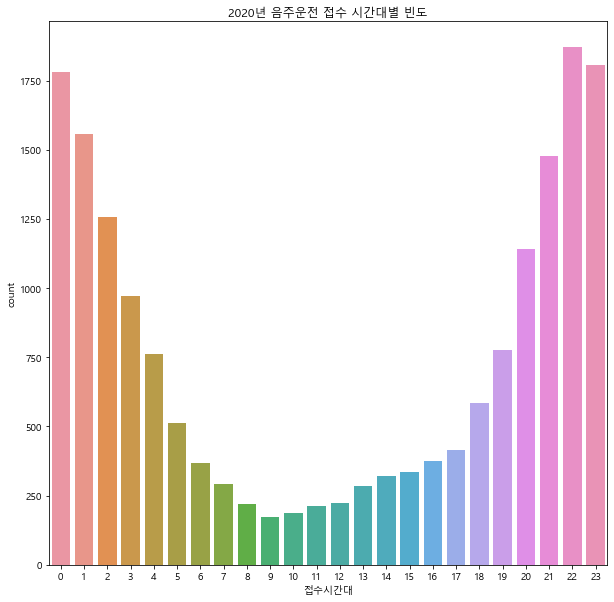

In [22]:
plt.figure(figsize=(10,10))
plt.title("2020년 음주운전 접수 시간대별 빈도")
sns.countplot("접수시간대", data=drunken20)

## 1-2. 2020년 교통사고 시간대별 그래프

In [23]:
acc20

,index,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부,요일
2,54,대전청,2020-01-01 00:21:35,13,10,401,1,대전광역시 유성구 봉명동(행정:온천1동) 541-26,127.348625,36.353829,NaN,Wednesday
3,66,대전청,2020-01-01 00:43:01,13,10,401,1,대전광역시 중구 오류동(행정:오류동) 187-27,127.405055,36.328573,NaN,Wednesday
4,117,대전청,2020-01-01 18:43:35,13,10,401,3,대전광역시 동구 가양동 630,127.445780,36.345500,N,Wednesday
6,144,대전청,2020-01-01 19:08:53,13,10,401,1,대전광역시 동구 판암동(행정:판암2동) 237,127.459160,36.323490,NaN,Wednesday
8,147,대전청,2020-01-01 19:15:25,13,10,401,1,대전광역시 중구 태평동(태평2동) 378-7,127.394136,36.326646,NaN,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...
146674,1255239,충남청,2020-12-31 00:33:54,19,10,401,1.0,충청남도 서산시 온석동(동문1동) 354-2,126.471991,36.801294,Y,Thursday
146675,1255242,충남청,2020-12-31 00:34:45,19,10,401,1.0,충청남도 서산시 온석동(동문1동) 393-3,126.471756,36.801603,Y,Thursday
146678,1255280,대전청,2020-12-31 01:08:43,13,10,401,1.0,대전광역시 중구 대흥동(행정:대흥동),127.428343,36.324386,NaN,Thursday
146680,1255312,대전청,2020-12-31 01:17:01,13,10,401,1.0,대전광역시 서구 도마동(행정:도마2동) 549-1,127.369099,36.312971,NaN,Thursday


In [24]:
acc20['접수완료일시'] = pd.to_datetime(acc20['접수완료일시'])

C:\Users\USER\AppData\Local\Temp\ipykernel_9564\3178938509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc20['접수완료일시'] = pd.to_datetime(acc20['접수완료일시'])


In [25]:
acc20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96029 entries, 2 to 146681
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   96029 non-null  int64         
 1   접수부서코드  96029 non-null  object        
 2   접수완료일시  96029 non-null  datetime64[ns]
 3   경찰청구분   96029 non-null  int64         
 4   사건상태코드  96029 non-null  int64         
 5   사건종별코드  96029 non-null  int64         
 6   신고성별    96029 non-null  object        
 7   발생지점    96029 non-null  object        
 8   발생좌표x   96029 non-null  float64       
 9   발생좌표y   96029 non-null  float64       
 10  동일사건여부  49947 non-null  object        
 11  요일      96029 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(5)
memory usage: 9.5+ MB


In [26]:
# df[column nam].dt.hour 
acc20["접수시간대"] = acc20['접수완료일시'].dt.hour

C:\Users\USER\AppData\Local\Temp\ipykernel_9564\1936316365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc20["접수시간대"] = acc20['접수완료일시'].dt.hour


In [27]:
acc20.head(3)

,index,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부,요일,접수시간대
2,54,대전청,2020-01-01 00:21:35,13,10,401,1,대전광역시 유성구 봉명동(행정:온천1동) 541-26,127.348625,36.353829,NaN,Wednesday,0
3,66,대전청,2020-01-01 00:43:01,13,10,401,1,대전광역시 중구 오류동(행정:오류동) 187-27,127.405055,36.328573,NaN,Wednesday,0
4,117,대전청,2020-01-01 18:43:35,13,10,401,3,대전광역시 동구 가양동 630,127.445780,36.345500,N,Wednesday,18


C:\py\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'2020년 교통사고 접수 시간대별 빈도'}, xlabel='접수시간대', ylabel='count'>

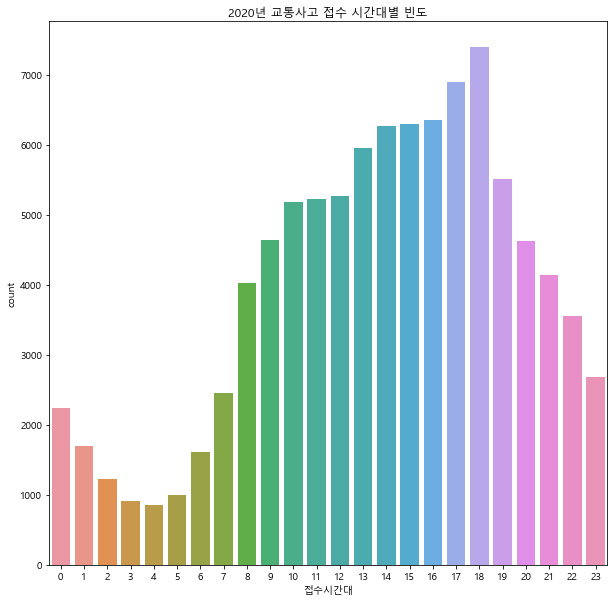

In [28]:
plt.figure(figsize=(10,10))
plt.title("2020년 교통사고 접수 시간대별 빈도")
sns.countplot("접수시간대", data=acc20)

# 2. 2020년 교통사고와 음주운전 데이터 준비

In [32]:
data21 = pd.read_csv("data/주소포함_2021.csv", encoding = "cp949")
data21

,index,RECV_DEPT_NM,RECV_CPLT_DM,NPA_CL,EVT_STAT_CD,EVT_CL_CD,RPTER_SEX,HPPN_PNU_ADDR,HPPN_X,HPPN_Y,SME_EVT_YN,요일
0,14,충남청,2021-03-07 00:02:48,19,10,406,1.0,충청남도 천안시 서북구 불당동(불당동) 1625,127.107500,36.811944,NaN,Sunday
1,20,충남청,2021-03-07 00:09:04,19,10,402,1.0,충청남도 천안시 동남구 문화동(문성동) 41-5,127.150988,36.811792,Y,Sunday
2,23,대전청,2021-03-07 00:07:54,13,10,401,2.0,대전광역시 서구 괴정동(괴정동) 367-40,127.371854,36.341961,NaN,Sunday
3,26,대전청,2021-03-07 00:15:27,13,10,401,1.0,대전광역시 유성구 상대동 471-2,127.339334,36.346899,NaN,Sunday
4,44,충남청,2021-03-07 00:12:08,19,10,403,2.0,충청남도 공주시 우성면 평목리,127.090733,36.453397,NaN,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
276628,2593994,대전청,2023-01-15 20:01:39,13,10,401,1.0,대전 서구 괴정동 88-6,127.384284,36.334507,NaN,Sunday
276629,2594002,충남청,2023-01-16 21:26:56,19,10,401,1.0,충청남도 태안군 근흥면 두야리(근흥면 ) 246-2,126.262393,36.751467,NaN,Monday
276630,2594006,충남청,2023-01-14 01:02:48,19,10,403,2.0,충청남도 천안시 동남구 다가동 (일봉동 ) 61-35,127.147678,36.789125,NaN,Saturday
276631,2594019,대전청,2023-01-14 17:35:38,13,10,401,1.0,대전광역시 대덕구 신탄진동 (행정:신탄진동 ) 129-7,127.433785,36.450725,NaN,Saturday


In [34]:
data21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276633 entries, 0 to 276632
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   index          276633 non-null  int64  
 1   RECV_DEPT_NM   276633 non-null  object 
 2   RECV_CPLT_DM   276633 non-null  object 
 3   NPA_CL         276633 non-null  int64  
 4   EVT_STAT_CD    276633 non-null  int64  
 5   EVT_CL_CD      276633 non-null  int64  
 6   RPTER_SEX      276633 non-null  float64
 7   HPPN_PNU_ADDR  276633 non-null  object 
 8   HPPN_X         276593 non-null  float64
 9   HPPN_Y         276593 non-null  float64
 10  SME_EVT_YN     66823 non-null   object 
 11  요일             276633 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 25.3+ MB


In [36]:
# 컬럼명 수정
data21.rename(columns={"RECV_DEPT_NM":"접수부서코드","RECV_CPLT_DM":"접수완료일시", "NPA_CL":"경찰청구분", 
                       "EVT_STAT_CD":"사건상태코드","EVT_CL_CD":"사건종별코드","RPTER_SEX":"신고성별",
                       "HPPN_PNU_ADDR":"발생지점","HPPN_X":"발생좌표x","HPPN_Y":"발생좌표y","SME_EVT_YN":"동일사건여부"}, inplace=True)


In [37]:
data21.head(3)

,index,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부,요일
0,14,충남청,2021-03-07 00:02:48,19,10,406,1.0,충청남도 천안시 서북구 불당동(불당동) 1625,127.107500,36.811944,NaN,Sunday
1,20,충남청,2021-03-07 00:09:04,19,10,402,1.0,충청남도 천안시 동남구 문화동(문성동) 41-5,127.150988,36.811792,Y,Sunday
2,23,대전청,2021-03-07 00:07:54,13,10,401,2.0,대전광역시 서구 괴정동(괴정동) 367-40,127.371854,36.341961,NaN,Sunday


In [38]:
drunken21= data21[data21["사건종별코드"]==406]    # 음주운전
acc21 = data21[data21["사건종별코드"]==401]    #교통사고(사망하지도 않았고 뺑소니도 아닌 것)



In [40]:
drunken21.tail(3)

,index,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부,요일
276598,2593635,충남청,2023-01-15 01:10:21,19,10,406,1.0,충청남도 논산시 광석면 갈산리(광석면 ) 410-5,127.061413,36.226907,NaN,Sunday
276605,2593698,충남청,2023-01-14 03:53:27,19,10,406,1.0,충청남도 보령시 신흑동 (대천5동 ) 1805,126.514892,36.310944,Y,Saturday
276614,2593799,대전청,2023-01-14 17:01:35,13,10,406,2.0,대전광역시 유성구 지족동 (노은3동 ) 1041,127.304497,36.381533,Y,Saturday


In [41]:
acc21.tail(3)

,index,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부,요일
276629,2594002,충남청,2023-01-16 21:26:56,19,10,401,1.0,충청남도 태안군 근흥면 두야리(근흥면 ) 246-2,126.262393,36.751467,NaN,Monday
276631,2594019,대전청,2023-01-14 17:35:38,13,10,401,1.0,대전광역시 대덕구 신탄진동 (행정:신탄진동 ) 129-7,127.433785,36.450725,NaN,Saturday
276632,2594035,대전청,2023-01-15 01:13:20,13,10,401,1.0,대전광역시 대덕구 평촌동 (행정:덕암동 ) 346,127.428287,36.425403,Y,Sunday


## 2-1. 2021년 음주운전 시간대별 그래프

In [42]:
drunken21['접수완료일시'] = pd.to_datetime(drunken21['접수완료일시'])

C:\Users\USER\AppData\Local\Temp\ipykernel_9564\2733489803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drunken21['접수완료일시'] = pd.to_datetime(drunken21['접수완료일시'])


In [43]:
drunken21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51858 entries, 0 to 276614
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   51858 non-null  int64         
 1   접수부서코드  51858 non-null  object        
 2   접수완료일시  51858 non-null  datetime64[ns]
 3   경찰청구분   51858 non-null  int64         
 4   사건상태코드  51858 non-null  int64         
 5   사건종별코드  51858 non-null  int64         
 6   신고성별    51858 non-null  float64       
 7   발생지점    51858 non-null  object        
 8   발생좌표x   51849 non-null  float64       
 9   발생좌표y   51849 non-null  float64       
 10  동일사건여부  15503 non-null  object        
 11  요일      51858 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 5.1+ MB


In [44]:
drunken21["접수시간대"] = drunken21['접수완료일시'].dt.hour

C:\Users\USER\AppData\Local\Temp\ipykernel_9564\4067754296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drunken21["접수시간대"] = drunken21['접수완료일시'].dt.hour


In [45]:
drunken21.head(3)

,index,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부,요일,접수시간대
0,14,충남청,2021-03-07 00:02:48,19,10,406,1.0,충청남도 천안시 서북구 불당동(불당동) 1625,127.107500,36.811944,NaN,Sunday,0
5,48,충남청,2021-03-07 00:13:32,19,10,406,1.0,충청남도 당진시 송산면 상거리 321-6,126.680044,36.933368,NaN,Sunday,0
26,191,충남청,2021-01-03 00:22:46,19,10,406,1.0,충청남도 천안시 서북구 성거읍 요방리(성거읍) 127-6,127.182098,36.854338,NaN,Sunday,0


C:\py\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'2021년 음주운전 접수 시간대별 빈도'}, xlabel='접수시간대', ylabel='count'>

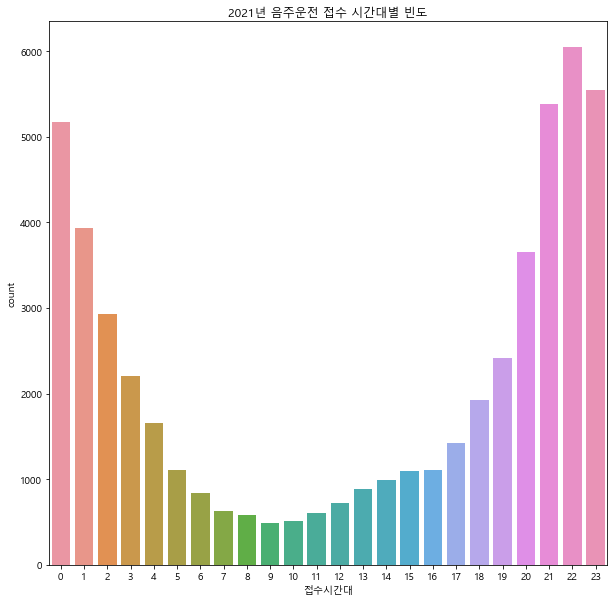

In [46]:
plt.figure(figsize=(10,10))
plt.title("2021년 음주운전 접수 시간대별 빈도")
sns.countplot("접수시간대", data=drunken21)

## 2-2. 2021년 교통사고 시간대별 그래프

In [49]:
acc21['접수완료일시'] = pd.to_datetime(acc21['접수완료일시'])

C:\Users\USER\AppData\Local\Temp\ipykernel_9564\3438881720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc21['접수완료일시'] = pd.to_datetime(acc21['접수완료일시'])


In [50]:
acc21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163300 entries, 2 to 276632
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   index   163300 non-null  int64         
 1   접수부서코드  163300 non-null  object        
 2   접수완료일시  163300 non-null  datetime64[ns]
 3   경찰청구분   163300 non-null  int64         
 4   사건상태코드  163300 non-null  int64         
 5   사건종별코드  163300 non-null  int64         
 6   신고성별    163300 non-null  float64       
 7   발생지점    163300 non-null  object        
 8   발생좌표x   163283 non-null  float64       
 9   발생좌표y   163283 non-null  float64       
 10  동일사건여부  36376 non-null   object        
 11  요일      163300 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 16.2+ MB


In [51]:
acc21["접수시간대"] = acc21['접수완료일시'].dt.hour

C:\Users\USER\AppData\Local\Temp\ipykernel_9564\1025330391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acc21["접수시간대"] = acc21['접수완료일시'].dt.hour


In [52]:
acc21.head(3)

,index,접수부서코드,접수완료일시,경찰청구분,사건상태코드,사건종별코드,신고성별,발생지점,발생좌표x,발생좌표y,동일사건여부,요일,접수시간대
2,23,대전청,2021-03-07 00:07:54,13,10,401,2.0,대전광역시 서구 괴정동(괴정동) 367-40,127.371854,36.341961,NaN,Sunday,0
3,26,대전청,2021-03-07 00:15:27,13,10,401,1.0,대전광역시 유성구 상대동 471-2,127.339334,36.346899,NaN,Sunday,0
6,49,충남청,2021-03-07 00:13:58,19,10,401,1.0,충청남도 천안시 동남구 목천읍 운전리(목천읍) 333-1,127.230796,36.767596,NaN,Sunday,0


C:\py\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'2021년 교통사고 접수 시간대별 빈도'}, xlabel='접수시간대', ylabel='count'>

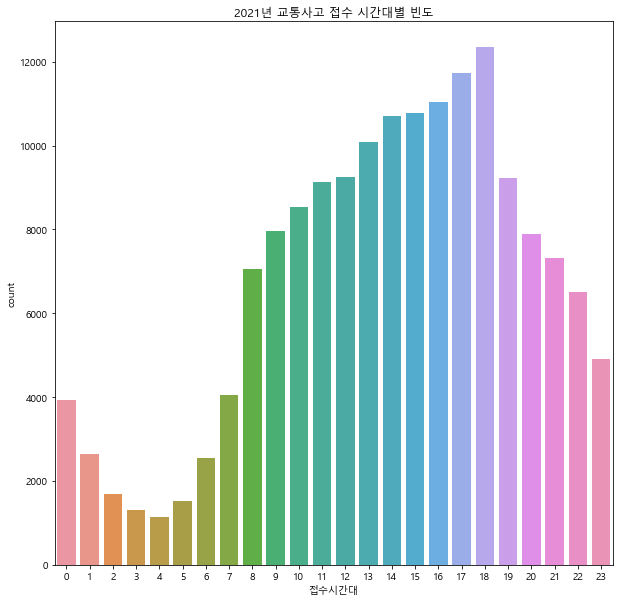

In [53]:
plt.figure(figsize=(10,10))
plt.title("2021년 교통사고 접수 시간대별 빈도")
sns.countplot("접수시간대", data=acc21)